In [1]:
import numpy as np
import pandas as pd

from scipy.stats.distributions import norm

import matplotlib.pyplot as plt
import seaborn as sns

# Rejection Sampling

Now let's explore ways to generate samples from a distribution when we only know the functional form of its PDF.  Rejection sampling is one approach.

We'll refer to the target distribution that we want to draw samples from as $p(x)$. We can use another distribution $q(x)$ that we *can* draw samples from (whose PDF encompases the whole target distribution after rescaling by some value $k$) to draw samples from the target distribution.

We do so by drawing a sample $z$ from our sampling distribution.  We then generate a random number $u$ unifomly between 0 and $k*q(z)$.  If $u \leq p(z)$ the we save the sample.

In [4]:
mu = 10
sigma = 3

def p(x):
    '''The target distribution to draw samples from'''
    return norm.pdf(x, loc=mu, scale=sigma)

def q(x):
    '''A distribution we can draw samples from'''
    return np.ones_like(x)


x = np.linspace(-50, 50, 1000)
k = .4 #max(p(x) / q(x))

def rejection_sample(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.uniform(-50, 50)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

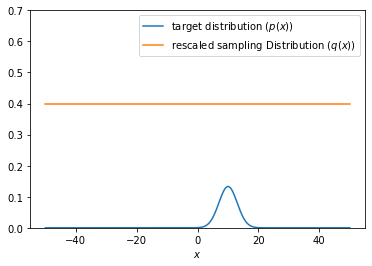

In [5]:
plt.plot(x, p(x), label='target distribution ($p(x)$)')
plt.plot(x, k*q(x), label='rescaled sampling Distribution ($q(x)$)')

plt.ylim(0, .7)
plt.legend()
plt.xlabel('$x$');

In [6]:
s = rejection_sample(iter=100000)
print("{} samples drawn from target distribution".format(len(s)))

2489 samples drawn from target distribution


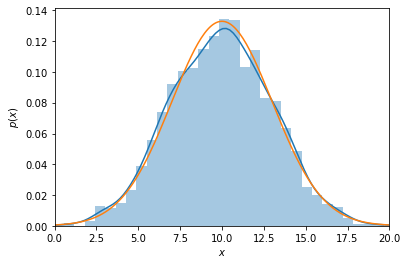

In [8]:
sns.distplot(s)
plt.plot(x, p(x))
plt.xlim(0, 20)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');

Now let's sample a slightly more complex distribution.  We'll also switch to a normal sampling distribution.

In [9]:
def p(x):
    return .5*(norm.pdf(x, loc=mu, scale=sigma) + \
        norm.pdf(x, loc=mu+5, scale=sigma/2))

def q(x):
    return norm.pdf(x, loc=mu, scale=3*sigma)

k = max(p(x) / q(x))

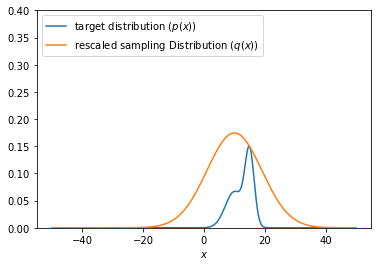

In [10]:
plt.plot(x, p(x), label='target distribution ($p(x)$)')
plt.plot(x, k*q(x), label='rescaled sampling Distribution ($q(x)$)')

plt.ylim(0, .4)
plt.legend(loc='upper left')
plt.xlabel('$x$');

In [11]:
def rejection_sample(iter=1000):
    samples = []
    
    for i in range(iter):
        z = norm.rvs(loc=mu, scale=3*sigma)
        u = np.random.uniform(0, k*q(z))
        
        if u <= p(z):
            samples.append(z)
    return np.array(samples)

In [12]:
samps = rejection_sample(iter=100000)

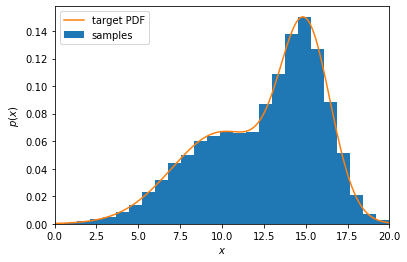

In [13]:
plt.hist(samps, bins=30, density=True, label='samples')
plt.plot(x, p(x), label='target PDF')
plt.legend()
plt.xlim(0, 20)
plt.xlabel('$x$')
plt.ylabel('$p(x)$');